Project: https://signate.jp/competitions/134


# Description

In this competition we are asked to classify satellite images to be Tropical Storms or not. This is a binary classification problem.

I will apply a CNN. The dataset contains much more nonTC data than TC data, so it is challenging to get a right balanced dataset. In addition, using Google Colab I have some restrictions so I'll be using just a small part of the dataset.

In this notebook I'll apply custom keras generators to load the data.

# Prepare environment

Prepare folders and download the datasets.

In [0]:
DOWNLOAD = './download/'
TMP = './tmp/'

UNZIP = './unzip/'
UNZIP_TEST = './unzip/test/'
UNZIP_TRAIN_TC = './unzip/train/TC/'
UNZIP_TRAIN_NONTC = './unzip/train/nonTC/'

DS = './dataset/'

DS_TRAIN = './dataset/train/'
DS_TRAIN_TC = './dataset/train/TC/'
DS_TRAIN_NONTC = './dataset/train/nonTC/'

DS_VALIDATION = './dataset/validation/'
DS_VALIDATION_TC = './dataset/validation/TC/'
DS_VALIDATION_NONTC = './dataset/validation/nonTC/'

DS_TEST = './dataset/test/'

In [0]:
import os 

os.makedirs(UNZIP)
os.makedirs(DOWNLOAD)
os.makedirs(TMP)
os.makedirs(DS)
os.makedirs(DS_TRAIN)
os.makedirs(DS_TEST)

In [0]:
import requests

def download_file_from_google_drive(urls, destinations):
    def get_id_from_url (url):
      return url.split("=")[1]
  
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                return value

        return None

    def save_response_content(response, destination):
        CHUNK_SIZE = 32768

        with open(destination, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)

    def already_exists (destination):
      return os.access(destination, os.F_OK)
                    
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    i = 0
    for url in urls:
      if already_exists (destinations[i]):
        i += 1
        continue
      
      print ("Downloading from "+str(url))
      id = get_id_from_url(url)
      response = session.get(URL, params = { 'id' : id }, stream = True)
      token = get_confirm_token(response)

      if token:
          params = { 'id' : id, 'confirm' : token }
          response = session.get(URL, params = params, stream = True)

      save_response_content(response, destinations[i])

      i += 1


In [0]:
TRAIN_FILE_1 = 'train_1.zip'
TRAIN_FILE_14 = 'train_14.zip'
TRAIN_FILE_15 = 'train_15.zip'
TRAIN_FILE_16 = 'train_16.zip'
TEST_FILE_1 = 'test_1.zip'
TEST_FILE_2 = 'test_2.zip'
TEST_FILE_3 = 'test_3.zip'

In [0]:
urls = ["https://drive.google.com/open?id=XXXXXXXXXXXX",
        "https://drive.google.com/open?id=XXXXXXXXXXXX",
        "https://drive.google.com/open?id=XXXXXXXXXXXX",
        "https://drive.google.com/open?id=XXXXXXXXXXXX",
        "https://drive.google.com/open?id=XXXXXXXXXXXX",
        "https://drive.google.com/open?id=XXXXXXXXXXXX",
        "https://drive.google.com/open?id=XXXXXXXXXXXX"
       ]
destinations = [DOWNLOAD+TRAIN_FILE_1, 
                DOWNLOAD+TRAIN_FILE_14, 
                DOWNLOAD+TRAIN_FILE_15, 
                DOWNLOAD+TRAIN_FILE_16, 
                DOWNLOAD+TEST_FILE_1, 
                DOWNLOAD+TEST_FILE_2, 
                DOWNLOAD+TEST_FILE_3]

assert len(urls) == len(destinations)

download_file_from_google_drive (urls, destinations)

In [123]:
!ls -la ./download/

total 10813800
drwxr-xr-x 2 root root       4096 Sep 11 05:32 .
drwxr-xr-x 1 root root       4096 Sep 11 05:01 ..
-rw-r--r-- 1 root root 2157272529 Sep 11 05:32 test_1.zip
-rw-r--r-- 1 root root 2157275172 Sep 11 05:32 test_2.zip
-rw-r--r-- 1 root root   29125071 Sep 11 04:08 test_3.zip
-rw-r--r-- 1 root root 2158604769 Sep 11 05:31 train_14.zip
-rw-r--r-- 1 root root 2166318380 Sep 11 05:32 train_15.zip
-rw-r--r-- 1 root root 2158586692 Sep 11 04:08 train_16.zip
-rw-r--r-- 1 root root  246104122 Sep 11 05:31 train_1.zip


In [126]:
import zipfile

def unzip (file, destination):
  zip_ref = zipfile.ZipFile(file, 'r')
  zip_ref.extractall(destination)
  zip_ref.close()

for file in os.listdir (DOWNLOAD):
  unzip (DOWNLOAD+file, UNZIP)
  print ("File {} unzipped".format(DOWNLOAD+file))

File ./download/train_16.zip unzipped
File ./download/train_1.zip unzipped
File ./download/test_3.zip unzipped
File ./download/test_2.zip unzipped
File ./download/train_14.zip unzipped
File ./download/train_15.zip unzipped
File ./download/test_1.zip unzipped


# Visualize an example

In [8]:
!pip install tifffile

    100% |████████████████████████████████| 112kB 5.6MB/s 
  Running setup.py bdist_wheel for tifffile ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/22/5b/8e/a9bc85b5dfc1cc91b840b91bfa362a11eeda847d2d4464304e
Successfully built tifffile


Image shape (64, 64)
Colors: None
Extreme values: (0.1223573312163353, 1.0629898309707642)
Image mode: F


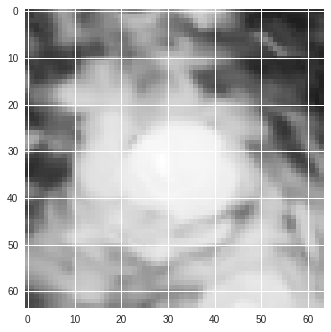

Random pixel [0.97346544 0.97346544 0.97346544]


In [135]:
# Converting the 1D image to 3D

import PIL.Image

pimage = PIL.Image.open(tmp_img)
image = np.array(pimage)
print ("Image shape {}".format(image.shape))
print ("Colors: {}".format (pimage.getcolors()))
print ("Extreme values: {}".format(pimage.getextrema()))
print ("Image mode: {}".format (pimage.mode))

diff = pimage.getextrema()
maxv = np.amax(image)
image2 = np.zeros((64,64,3))

image2[:,:,0] = image/maxv
image2[:,:,1] = image/maxv
image2[:,:,2] = image/maxv

plt.imshow(image2)
plt.show()

print ("Random pixel {}".format(image[30][30]))


(<matplotlib.figure.Figure at 0x7f8cddd1d150>,
 <matplotlib.image.AxesImage at 0x7f8cdc9c77d0>)

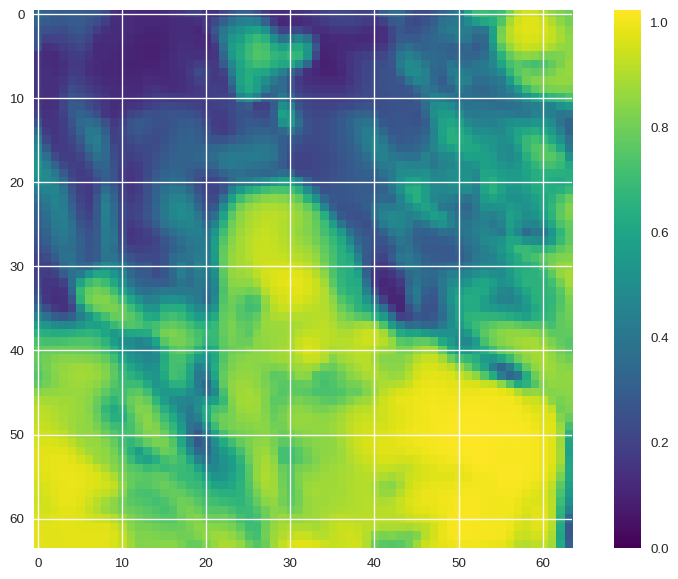

In [16]:
# non tc image in 1D

tmp_img = UNZIP_TRAIN_NONTC+os.listdir(UNZIP_TRAIN_NONTC)[0]
P = tiff.imread(tmp_img) 
tiff.imshow(P)

# Create the sets

We have to create a balanced **training** dataset with 50% class distribution. The dataset provided by the organization is unbalanced. 

We should also create an equally distributed **validation** dataset...

In [127]:
print ("Number of TC examples: {}".format(len(os.listdir(UNZIP_TRAIN_TC))))
print ("Number of nonTC examples: {}".format(len(os.listdir(UNZIP_TRAIN_NONTC))))

Number of TC examples: 13993
Number of nonTC examples: 448323


The **goal** is:

Training set of 13k TC images and 13k nonTC images approximately.

The validation dataset will be 993 TC images and 993 nonTC images.

Let's first create the folder structure.

We'll have train and validation folders and inside them one folder per class:

+ dataset
  + train
    - TC : 13k
    - nonTC: 13k
  + validation:
    - TC: 993
    - nonTC: 993

In [0]:
TRAIN_EXAMPLES = 12500
VALIDATION_EXAMPLES = 1490

In [0]:
!rm -r ./dataset/*

In [0]:
!mkdir ./dataset/train
!mkdir ./dataset/validation
!mkdir ./dataset/train/TC
!mkdir ./dataset/validation/TC
!mkdir ./dataset/train/nonTC
!mkdir ./dataset/validation/nonTC
!mkdir ./dataset/test

In [0]:
import random
import numpy as np

In [0]:
'''
Let's work first with TC images.

We'll generate X random indexes between 0 and 13993. 
We'll read the directory and we'll move 
the images with those indexes, to the validation dataset.
The rest, will be moved to the train dataset.
'''

import shutil

def files_in_folder (folder):
  print ("Number of files in {} = {}".format (folder, len(os.listdir(folder))))

def move_files(indexes, origin, destination):
  files = os.listdir(origin)
  for index in indexes:
    file_2_move = files[index]
    shutil.move (origin+file_2_move, destination+file_2_move)
    
def move_all_files (origin, destination):
  for file in os.listdir(origin):
    shutil.move (origin+file, destination+file)  

In [0]:
# move 993 images from UNZIP_TRAIN_TC to DS_VALIDATION_TC
RANGE_BOTTOM = 0
RANGE_TOP = len(os.listdir(UNZIP_TRAIN_TC))-1
N_RECORDS = VALIDATION_EXAMPLES

indexes = sorted (random.sample (range(RANGE_BOTTOM, RANGE_TOP), N_RECORDS))
move_files(indexes, UNZIP_TRAIN_TC, DS_VALIDATION_TC)

In [0]:
move_all_files (DS_TRAIN_TC, DS_VALIDATION_TC)

In [133]:
files_in_folder (UNZIP_TRAIN_TC)
files_in_folder (DS_TRAIN_TC)
files_in_folder (DS_VALIDATION_TC)

Number of files in ./unzip/train/TC/ = 12503
Number of files in ./dataset/train/TC/ = 0
Number of files in ./dataset/validation/TC/ = 1490


we moved 993 images to the validation dataset. Let's move the rest of the pictures to the TC train set.

In [0]:
# move the rest of TC images from UNZIP_TRAIN_TC to DS_TRAIN_TC
move_all_files (UNZIP_TRAIN_TC, DS_TRAIN_TC)

In [135]:
files_in_folder (UNZIP_TRAIN_TC)
files_in_folder (DS_TRAIN_TC)
files_in_folder (DS_VALIDATION_TC)

Number of files in ./unzip/train/TC/ = 0
Number of files in ./dataset/train/TC/ = 12503
Number of files in ./dataset/validation/TC/ = 1490


In [0]:
# move 993 nonTC images from unzip to validation

RANGE_BOTTOM = 0
RANGE_TOP = len(os.listdir(UNZIP_TRAIN_NONTC))-1
N_RECORDS = VALIDATION_EXAMPLES

indexes = sorted (random.sample (range(RANGE_BOTTOM, RANGE_TOP), N_RECORDS))
move_files(indexes, UNZIP_TRAIN_NONTC, DS_VALIDATION_NONTC)

In [137]:
files_in_folder (DS_VALIDATION_NONTC)
files_in_folder (DS_VALIDATION_TC)

Number of files in ./dataset/validation/nonTC/ = 1490
Number of files in ./dataset/validation/TC/ = 1490


Validation set ready!

Let's do the same for the training set.

In [0]:
# move 13000 nonTC images from unzip to training

RANGE_BOTTOM = 0
RANGE_TOP = len(os.listdir(UNZIP_TRAIN_NONTC))-1
N_RECORDS = TRAIN_EXAMPLES

indexes = sorted (random.sample (range(RANGE_BOTTOM, RANGE_TOP), N_RECORDS))
move_files(indexes, UNZIP_TRAIN_NONTC, DS_TRAIN_NONTC)

In [139]:
files_in_folder (DS_TRAIN_NONTC)
files_in_folder (DS_TRAIN_TC)

Number of files in ./dataset/train/nonTC/ = 12500
Number of files in ./dataset/train/TC/ = 12503


Training set ready! Let's check the folders:

In [140]:
files_in_folder (UNZIP_TRAIN_NONTC)
files_in_folder (UNZIP_TRAIN_TC)
files_in_folder (DS_TRAIN_NONTC)
files_in_folder (DS_TRAIN_TC)
files_in_folder (DS_VALIDATION_NONTC)
files_in_folder (DS_VALIDATION_TC)
files_in_folder (DS_TEST)

Number of files in ./unzip/train/nonTC/ = 434333
Number of files in ./unzip/train/TC/ = 0
Number of files in ./dataset/train/nonTC/ = 12500
Number of files in ./dataset/train/TC/ = 12503
Number of files in ./dataset/validation/nonTC/ = 1490
Number of files in ./dataset/validation/TC/ = 1490
Number of files in ./dataset/test/ = 0


Test files from unzip to test folder under dataset.

In [0]:
# preparation of test files
move_all_files (UNZIP_TEST, DS_TEST)

In [142]:
len(os.listdir(DS_TEST))

299135

# Image preprocessing

This is the standard Keras image preprocessing. But I won't be using it. 

The function addchannels is interesting as long as converts 1 channel into 3 channels image stacking the same channel 3 times. This is called from the default Keras generator.

In [154]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

# dimensions of our images.
img_width, img_height = 64, 64
batch_size = 64

def addchannels (nptensor):
  max_val = np.amax(nptensor)
  channel = nptensor[:,:,0] / max_val
  return np.dstack ((channel, channel, channel))

# this is the augmentation configuration we will use for training
#train_datagen = ImageDataGenerator(preprocessing_function=addchannels)
train_datagen = ImageDataGenerator()

# this is the augmentation configuration we will use for testing:
# only rescaling
#val_datagen = ImageDataGenerator (preprocessing_function=addchannels)
val_datagen = ImageDataGenerator ()

train_generator = train_datagen.flow_from_directory(
    DS_TRAIN,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle = True,
    color_mode='grayscale',
    class_mode='categorical',
    save_to_dir='./tmp')

validation_generator = val_datagen.flow_from_directory(
    DS_VALIDATION,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle = True,
    color_mode='grayscale',
    class_mode='categorical')


Found 26000 images belonging to 2 classes.
Found 1986 images belonging to 2 classes.


# Custom image generator

The best in that case is to read by ourselves the images. So I built my own generator.

This generator yields the image and the label together.

In [0]:
from PIL import Image

# for testing purposes
def get_input_test (path):
  x = get_input (path)
  return np.array([x])

# read the image
def get_input (path):
  pimage = Image.open(path)
  maxv = pimage.getextrema()[1]
  image_1d = np.array(pimage)/maxv
  return np.reshape(image_1d, (64,64,1))

# return the class based on the path
def get_output (path):
    img_class = path.split('/')[3]
    if img_class == 'TC':
      label = 1
    else:
      label = 0
    return (label)

In [0]:
def image_generator(files, batch_size = 64):
    
  while True:
    # Select files (paths/indices) for the batch
    batch_paths = np.random.choice(a = files, 
                                   size = batch_size)
    batch_input = []
    batch_output = [] 

    # Read in each input, perform preprocessing and get labels
    for input_path in batch_paths:
        input = get_input(input_path )
        output = get_output(input_path)

        batch_input += [ input ]
        batch_output += [ output ]

    # Return a tuple of (input,output) to feed the network
    batch_x = np.array( batch_input )
    batch_y = np.array( batch_output )

    yield (batch_x, batch_y)

In [0]:
# training dataset
TC_files = os.listdir('./dataset/train/TC')
for i in range(0,len(TC_files)):
  TC_files[i] = './dataset/train/TC/'+TC_files[i]

nonTC_files = os.listdir('./dataset/train/nonTC')
for i in range(0,len(nonTC_files)):
  nonTC_files[i] = './dataset/train/nonTC/'+nonTC_files[i]

train_files = TC_files + nonTC_files
random.shuffle(train_files)

In [0]:
# Validation dataset
TC_files = os.listdir('./dataset/validation/TC')
for i in range(0,len(TC_files)):
  TC_files[i] = './dataset/validation/TC/'+TC_files[i]

nonTC_files = os.listdir('./dataset/validation/nonTC')
for i in range(0,len(nonTC_files)):
  nonTC_files[i] = './dataset/validation/nonTC/'+nonTC_files[i]

val_files = TC_files + nonTC_files
random.shuffle(val_files)

In [148]:
test_files = os.listdir(DS_TEST)
print (len(test_files))

299135


In [0]:
# Creating the generators

train_generator = image_generator (train_files)

val_generator = image_generator (val_files)


In [150]:
train_batch, train_labels = next (train_generator)

print ("Batch shape: {}".format (train_batch.shape))
print ("Image shape: {}".format (train_batch[2].shape))
print ("Label = {}".format (train_labels[2]))

Batch shape: (64, 64, 64, 1)
Image shape: (64, 64, 1)
Label = 0


In [152]:
val_batch, val_labels = next (val_generator)

print ("Batch shape: {}".format (val_batch.shape))
print ("Image shape: {}".format (val_batch[2].shape))
print ("Label = {}".format (val_labels[2]))

Batch shape: (64, 64, 64, 1)
Image shape: (64, 64, 1)
Label = 0


# First try

Simple convolutional model. The input is the 1 channel image Outputs one single value after sigmoid function. 1 represents 'TC' and 0 represents 'nonTC'. 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (2, 2), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(256, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [154]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 63, 63, 16)        80        
_________________________________________________________________
activation_1360 (Activation) (None, 63, 63, 16)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        2080      
_________________________________________________________________
activation_1361 (Activation) (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        8256      
__________

# Training

In [155]:
batch_size = 64

model.fit_generator(
        train_generator,
        steps_per_epoch=TRAIN_EXAMPLES // batch_size,
        epochs=25,
        validation_data=val_generator,
        validation_steps=VALIDATION_EXAMPLES // batch_size)
#model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/25
195/195 [==============================] - 64s 326ms/step - loss: 0.5604 - acc: 0.7380 - val_loss: 0.4368 - val_acc: 0.7826
Epoch 2/25
195/195 [==============================] - 23s 116ms/step - loss: 0.4618 - acc: 0.7916 - val_loss: 0.5111 - val_acc: 0.7643
Epoch 3/25
195/195 [==============================] - 19s 98ms/step - loss: 0.4465 - acc: 0.8015 - val_loss: 0.3996 - val_acc: 0.8125
Epoch 4/25
195/195 [==============================] - 17s 90ms/step - loss: 0.4349 - acc: 0.8114 - val_loss: 0.4123 - val_acc: 0.8145
Epoch 5/25
195/195 [==============================] - 16s 84ms/step - loss: 0.4245 - acc: 0.8143 - val_loss: 0.4462 - val_acc: 0.7982
Epoch 6/25
195/195 [==============================] - 16s 82ms/step - loss: 0.4226 - acc: 0.8188 - val_loss: 0.4229 - val_acc: 0.8057
Epoch 7/25
195/195 [==============================] - 15s 79ms/step - loss: 0.4056 - acc: 0.8228 - val_loss: 0.4117 - val_acc: 0.8111
Epoch 8/25
195/195 [==============================] - 15s 78

# Transfer learning

The model is based on transfer learning having the base model not trainable + our own model on top (trainable). I didn't get the expected results from that experiment. To be analysed.

In [0]:
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile

from keras.models import Model
from keras.layers import Dense, MaxPooling2D, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras import optimizers

In [0]:
# create the base pre-trained model
base_model = NASNetMobile(input_shape=(64,64,3), include_top=False, weights='imagenet', pooling=None)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(2048, activation='relu')(x)
x = Dropout (0.2)(x)
# one fully connected layer more
x = Dense(1024, activation='relu')(x)
x = Dropout (0.2)(x)
# one fully connected layer more
x = Dense(512, activation='relu')(x)
# and a logistic layer --
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional from base model layers
for layer in base_model.layers:
  layer.trainable = False

# optimizer = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0) # It is recommended to leave the parameters of this optimizer at their default values.
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
batch_size = 64
epochs = 10
model.fit_generator(
        train_generator,
        steps_per_epoch=TRAIN_EXAMPLES // batch_size,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=VALIDATION_EXAMPLES // batch_size)


Epoch 1/10
54/54 [==============================] - 46s 845ms/step - loss: 0.8328 - acc: 0.6591 - val_loss: 0.6689 - val_acc: 0.5826
Epoch 2/10
54/54 [==============================] - 6s 112ms/step - loss: 0.5604 - acc: 0.7190 - val_loss: 0.7039 - val_acc: 0.5312
Epoch 3/10
54/54 [==============================] - 6s 113ms/step - loss: 0.5373 - acc: 0.7512 - val_loss: 0.6593 - val_acc: 0.5647
Epoch 4/10
54/54 [==============================] - 6s 113ms/step - loss: 0.5337 - acc: 0.7483 - val_loss: 0.9229 - val_acc: 0.5246
Epoch 5/10
54/54 [==============================] - 6s 113ms/step - loss: 0.5083 - acc: 0.7541 - val_loss: 0.7849 - val_acc: 0.5871
Epoch 6/10
54/54 [==============================] - 6s 113ms/step - loss: 0.5297 - acc: 0.7610 - val_loss: 1.0969 - val_acc: 0.5446
Epoch 7/10
54/54 [==============================] - 6s 113ms/step - loss: 0.5049 - acc: 0.7604 - val_loss: 0.6710 - val_acc: 0.5714
Epoch 8/10
54/54 [==============================] - 6s 114ms/step - loss: 0

# Prediction

In [157]:
print (DS_TEST)
print (len(os.listdir(DS_TEST)))

./dataset/test/
299135


In [0]:
def get_file_name(path):
  return path.split('/')[3]

def predict (path):
  x = get_input_test(path)
  preds = model.predict(x)
  
  if preds[0] >= 0.5:
    return 1
  else:
    return 0
  return 1

In [184]:
print (test_files[0])
predict (DS_TEST+test_files[0])

test_024176.tif


1

In [186]:
predictions = []
path_files = []
preds = 0

for file in test_files:
  predictions.append(predict (DS_TEST+file))
  path_files.append(file)
  preds += 1
  if (preds % 15000 == 0):
    print ("Number of predictions = {}".format(preds))
    

submission = pd.DataFrame({
        "predictions": predictions,
        "files": path_files
})

submission.to_csv('./out.tsv',index=False, header=False, sep='\t')
submission.head()

Number of predictions = 15000
Number of predictions = 30000
Number of predictions = 45000
Number of predictions = 60000
Number of predictions = 75000
Number of predictions = 90000
Number of predictions = 105000
Number of predictions = 120000
Number of predictions = 135000
Number of predictions = 150000
Number of predictions = 165000
Number of predictions = 180000
Number of predictions = 195000
Number of predictions = 210000
Number of predictions = 225000
Number of predictions = 240000
Number of predictions = 255000
Number of predictions = 270000
Number of predictions = 285000


,files,predictions
0,test_024176.tif,1
1,test_220215.tif,1
2,test_051789.tif,1
3,test_053055.tif,1
4,test_205838.tif,1
